Linear regression is represented by this equation:
$y = b0 + b1x + e$

$x$ stands for the independent variable,
$y$ for the dependent variable,
$e$ for correction or redidual,
$b0$ intercept,
$b1$ slope

The equation allows to fit a line that allows to predict the trend between given variables. The successfulness of a given model can be measured by e.g. $RMSE$ or $r^2$  


In [29]:
#importing everything that's necessary
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

#loading 1st df
df = pd.read_csv('data Mashable.csv')
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [30]:
temp = df.corr().sort_values('shares_log', ascending=False)
temp['shares_log']

shares_log                       1.000000
shares                           0.483322
is_weekend                       0.105919
global_subjectivity              0.093021
num_imgs                         0.085575
data_channel_is_socmed           0.085516
weekday_is_saturday              0.072644
weekday_is_sunday                0.071864
title_subjectivity               0.055161
global_sentiment_polarity        0.053199
title_sentiment_polarity         0.050216
data_channel_is_tech             0.047729
num_videos                       0.037147
data_channel_is_lifestyle        0.036926
n_tokens_content                 0.032897
weekday_is_friday                0.006309
id                              -0.003900
weekday_is_monday               -0.007843
n_tokens_title                  -0.012247
weekday_is_tuesday              -0.027738
weekday_is_thursday             -0.030329
average_token_length            -0.031730
weekday_is_wednesday            -0.032125
data_channel_is_bus             -0

Above we can see the strongest correlation between the shares_log and other variables. We will pass on the first rows and pick next 5 for our model.  

In [60]:
#creating x and y for the model and adding index with urls to the variables
x = df[["global_subjectivity", "num_imgs", "num_videos", "title_subjectivity", "is_weekend"]]
y = df["shares_log"]
x.index = df['url']
y.index = df['url']

In [61]:
dflength = len(df.index)
dftraininglength = round(len(df.index)*0.8)
dftestlength = len(df.index)-round(len(df.index)*0.8)

print("The length of the rows in this dataframe is: ")
print(dflength)
print("The training set will be about 80 percent of it which is: ")
print(dftraininglength)
print("The testing set will be the rest which is:")
print(dftestlength)

x_train = x.iloc[:dftraininglength]
y_train = y.iloc[:dftraininglength]

x_test = x.iloc[dftraininglength:dflength]
y_test = y.iloc[dftraininglength:dflength]

The length of the rows in this dataframe is: 
24999
The training set will be about 80 percent of it which is: 
19999
The testing set will be the rest which is:
5000


In [62]:
lm = LinearRegression() #crating LR model
lm.fit(x_train, y_train) #fiting training sets

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 3.078 + 0.277X


In [65]:
#RMSE
y_test_p = lm.predict(x_test)
print("r2 score:")
print(r2_score(y_test, y_test_p))
print("rmse score:")
print(math.sqrt(mean_squared_error(y_test, y_test_p)))

r2 score:
0.026486323377575727
rmse score:
0.3983244657120336


Above we can see the $r^2$ and $RMSE$ scores are both low as expected.

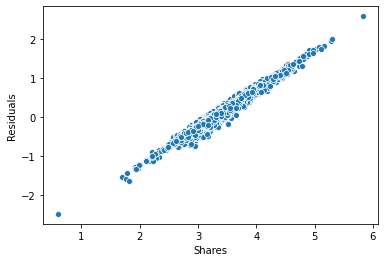

In [59]:
resid = y_test - y_test_p
sns.scatterplot(y_test, resid)
plt.xlabel('Shares')
plt.ylabel('Residuals')
plt.show()


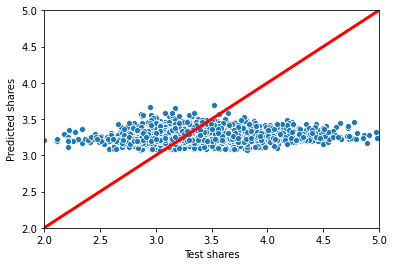

In [67]:
sns.scatterplot(y_test, y_test_p)
plt.xlim([2, 5]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([2, 5])
plt.plot([2, 5], [2, 5], color='red', lw=3) #Plot a diagonal length
plt.xlabel('Test shares')
plt.ylabel('Predicted shares')
plt.show()

On the first plot we can see the that residuals rise almost linearly with the bigger amount of shares. With the smallest residuals being around 3 shares. The next plot also shows a similar results and confirms that the model is not very efficient. 

In [70]:
print(pd.DataFrame(x.columns.values, lm.coef_))


                            0
0.276571  global_subjectivity
0.003659             num_imgs
0.004421           num_videos
0.045216   title_subjectivity
0.123315           is_weekend


The dataframe above shows the coefficiency of the given categories of the variables on the equation - global_subjectivity being the highest and num_imgs the lowest. 